In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nltk.download(("stopwords"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diabl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stops_español = set(stopwords.words("spanish"))
stops_español

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [5]:
stops_español = stops_español.union({"así", "si", "hacer", "cosas", "creo", "cómo", "solo", "aquí", "risas", "ser", "años", "gente", "vez", "historia", "ahora", "entonces", "bien", "puede", "pueden", "bueno", "aplauso", "aplausos", "ee", "uu", "datos", "personas", "hace", "hoy", "cada", "podemos", "ver", "dos", "luego", "hecho", "realmente", "tan", "decir", "saben", "ustedes", "dijo", "voy", "quiero", "bf", "dh", "número", "des", "gran", "día", "puedo", "mismo", "tres", "hombres", "mujeres", "hombre", "mujer", "hacia", "sólo", "manera", "tipo", "mejor", "tener", "alguien", "menos", "ejemplo", "parte", "respuesta", "forma", "todas", "muchas", "lugar", "poder", "incluso", "sino", "idea", "nunca", "dije", "momento", "siempre", "podría", "veces", "ahí", "sido", "allí", "dice", "va"})


In [6]:
stops_español = list(stops_español)
stops_español

['habrías',
 'nuestras',
 'tendremos',
 'se',
 'sus',
 'sí',
 'más',
 'habíais',
 'fuiste',
 'historia',
 'ella',
 'vez',
 'ese',
 'antes',
 'suyas',
 'hubieseis',
 'eras',
 'fuimos',
 'dice',
 'estaré',
 'habrás',
 'tenga',
 'todas',
 'ellas',
 'cómo',
 'poco',
 'muchos',
 'tus',
 'será',
 'así',
 'he',
 'sólo',
 'habríamos',
 'este',
 'seréis',
 'seamos',
 'tenéis',
 'fueran',
 'ustedes',
 'luego',
 'hubiesen',
 'seré',
 'sino',
 'soy',
 'habíamos',
 'unos',
 'ya',
 'estábamos',
 'habido',
 'tendríais',
 'no',
 'estada',
 'para',
 'seríamos',
 'puedo',
 'tendrías',
 'cosas',
 'habidos',
 'algo',
 'éramos',
 'eso',
 'gran',
 'habría',
 'estas',
 'estuviese',
 'todo',
 'tendrás',
 'mía',
 'hubieron',
 'tuya',
 'des',
 'estad',
 'que',
 'ti',
 'hubiera',
 'esto',
 'tenías',
 'por',
 'contra',
 'alguien',
 'era',
 'serán',
 'lo',
 'hubieses',
 'tuyos',
 'yo',
 'habidas',
 'nuestros',
 'menos',
 'ha',
 'teníamos',
 'día',
 'mi',
 'habrá',
 'lugar',
 'estéis',
 'vuestra',
 'siempre',
 'esa

In [7]:
df = pd.read_csv("./14-LDA/2020-05-01/ted_talks_es.csv")

In [8]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Al Gore sobre cómo evitar la crisis climática,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,Con el mismo humor y humanidad que irradió en ...,Muchas gracias Chris. Y es en verdad un gran h...
1,7,"David Pogue dice ""La Simplicidad Vende""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920803,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,"El columnista del New York Times, David Pogue,...","Hola contestadora automática, mi vieja amiga. ..."
2,53,Un recorrido por la renovación urbana de la ma...,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664029,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"En una charla altamente emotiva, la activista ...","Si están presentes aquí hoy, y estoy muy conte..."
3,66,Ken Robinson dice que las escuelas matan la cr...,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65052534,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson plantea de manera entretenida...,"Buenos días. ¿Cómo están? Ha sido increíble, ¿..."
4,92,Hans Rosling nos muestra las mejores estadísti...,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501766,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,Una manera única de presentar datos. Con la en...,"Hace unos 10 años, emprendí la tarea de enseña..."


In [12]:
print(df["transcript"][0])

Muchas gracias Chris. Y es en verdad un gran honor tener la oportunidad de venir a este escenario por segunda vez. Estoy extremadamente agradecido. He quedado conmovido por esta conferencia, y deseo agradecer a todos ustedes sus amables comentarios acerca de lo que tenía que decir la otra noche. Y digo eso sinceramente, en parte porque — (Sollozos fingidos) — ¡lo necesito! (Risas) ¡Pónganse en mi posición! Volé en el avión vicepresidencial por ocho años. ¡Ahora tengo que quitarme mis zapatos o botas para subirme a un avión! (Risas) (Aplausos) Les diré una rápida historia para ilustrar lo que ha sido para mí. Es una historia verdadera — cada parte de esto es verdad. Poco después de que Tipper y yo dejamos la — (Sollozos fingidos) — Casa Blanca — (Risas) — estábamos viajando desde nuestra casa en Nashville a una pequeña granja que tenemos 50 millas al este de Nashville — conduciendo nosotros mismos. Sé que suena como cualquier cosa para ustedes, pero — (Risas) — miré en el retrovisor y d

In [13]:
# Cuantas palabras hay en el corpus?
# Con el parametro stop_words, podemos ignorar palabras que no se contabilicen
vectorizer = CountVectorizer(stop_words=stops_español)

In [14]:
X = vectorizer.fit_transform(df["transcript"])

In [15]:
X

<3921x111273 sparse matrix of type '<class 'numpy.int64'>'
	with 1894596 stored elements in Compressed Sparse Row format>

In [16]:
lda = LatentDirichletAllocation(n_components=10, random_state=12345)

In [17]:
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [26]:
def graficar_palabras_top(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Tema {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)
    
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


In [31]:
palabras = vectorizer.get_feature_names_out()
palabras[3457]

'acuñado'

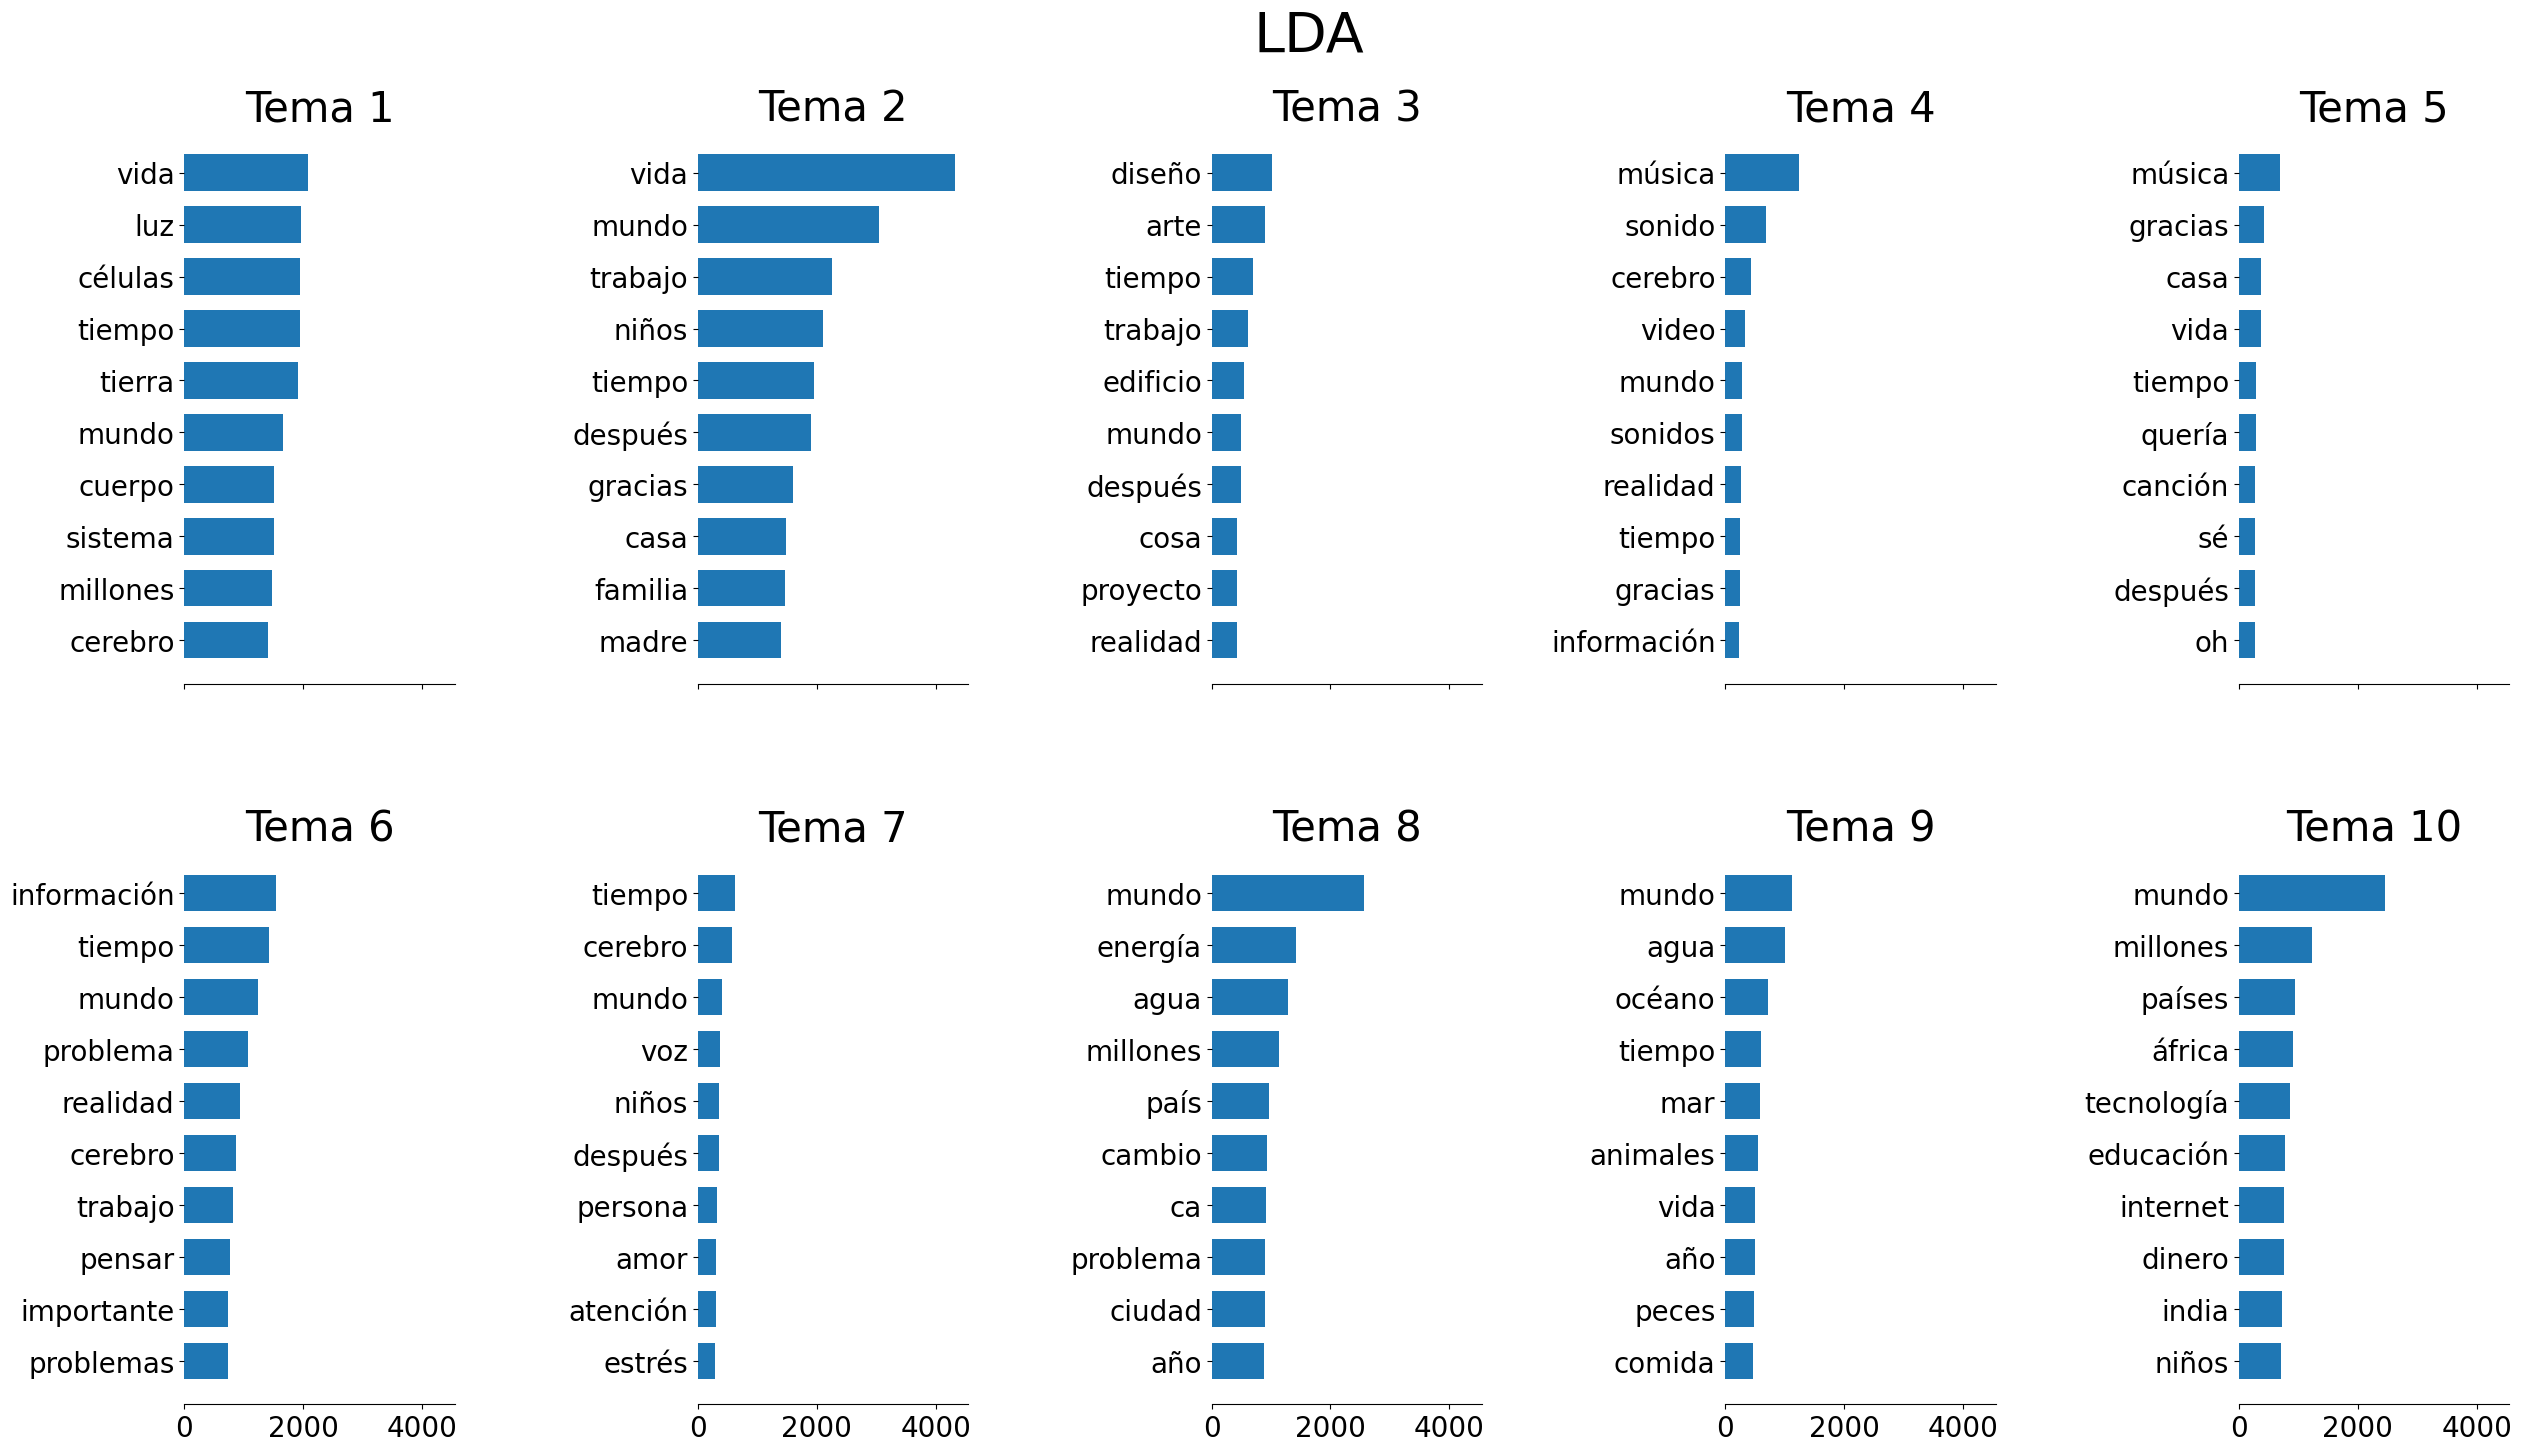

In [32]:
graficar_palabras_top(lda, palabras)

In [38]:
Z = lda.transform(X)

3341


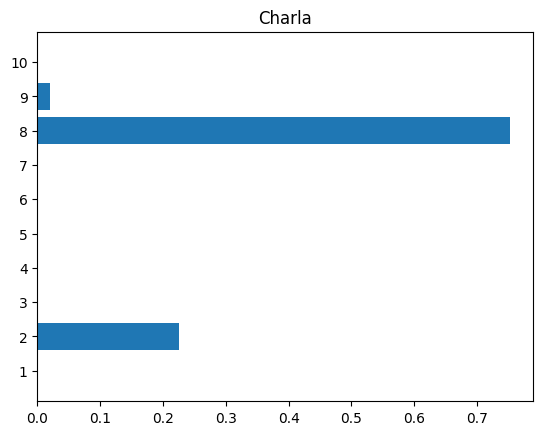

In [39]:
np.random.seed(1611)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("Charla");
print(i)

In [40]:
def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)
print(wrap(df.iloc[i]["transcript"]))

Una sacerdotisa solitaria se encamina hacia una cámara subterránea.
La gente llena las calles para verla proclamar su inocencia.  Pero no
importa.  Ya ha sido juzgada y declarada culpable.  ¿La sentencia?
Será enterrada viva.  En la cámara subterránea hay pan, agua, leche y
aceite.  Tendrá una lámpara, una cama y una manta, pero no saldrá
viva.  En el umbral, la sacerdotisa hace una pausa, proclama su
inocencia una última vez, luego entra en la cámara para nunca más ser
vista por el pueblo romano.  La sacerdotisa es una de las seis
vestales de Roma, cada una elegida meticulosamente entre las familias
más aristocráticas.  Pero ahora con su muerte, solo hay cinco, y se
debe elegir una nueva sacerdotisa.  La pequeña Licinia, de seis años,
presenció el espectáculo, sin sospechar que unos días después, sería
elegida como la próxima vestal.  Su edad, pertenecer a una familia
patricia y su aparente buena salud, la hacen mejor candidata, ante los
ojos romanos, para servir a la diosa Vesta.  Su

3735


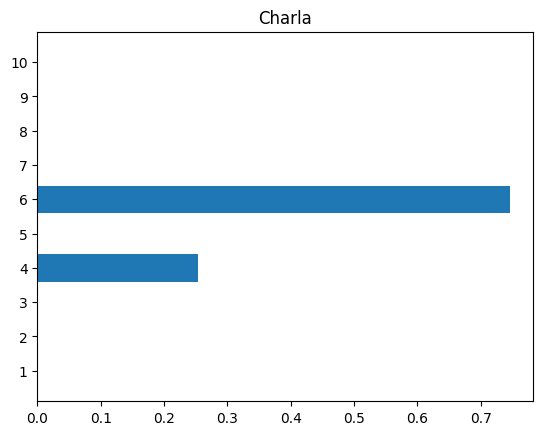

In [45]:
np.random.seed(1911)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("Charla");
print(i)

In [46]:
print(wrap(df.iloc[i]["transcript"]))

El 23 de abril de 2013, Associated Press puso el siguiente tuit en
Twitter.  Decía: "Noticia de última hora: dos explosiones en la Casa
Blanca.  Barack Obama ha resultado herido". Este tuit fue retuiteado
4000 veces en menos de cinco minutos, y se hizo viral a partir de ese
instante.  Ahora bien, este tuit no fue una noticia verdadera
difundida por la agencia Associated Press.  En realidad, fue una
noticia falsa, propagada por 'hackers' sirios que se habían hecho con
el control del Twitter de Associated Press.  Su objetivo era alterar a
la sociedad, pero alteraron mucho más, porque los algoritmos
automatizados de negociación inmediatamente interpretaron la
sensibilidad de este tuit, y comenzaron a operar en base a la
posibilidad de que el presidente de los EE. UU. hubiese sido herido o
asesinado en esa explosión.  Y cuando empezaron a tuitear, hicieron
que el mercado de valores se desplomara al instante, y se perdieron
140 mil millones de dólares en valor bursátil en un solo día.  Robe